In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel



In [2]:

# Load the dataset (make sure to use the correct path on your system)
file_path = 'data_clean.csv' # Replace with your actual file path
data = pd.read_csv(file_path)

# Assuming 'f_purchase_lh' is the target variable
target = 'f_purchase_lh'

In [3]:
# Convert the columns intended for one-hot encoding to string type to ensure consistency
data['race_desc'] = data['race_desc'].astype(str)
data['ctrycode_desc'] = data['ctrycode_desc'].astype(str)
data['clttype'] = data['clttype'].astype(str)
data['stat_flag'] = data['stat_flag'].astype(str)
data['cltsex_fix'] = data['cltsex_fix'].astype(str)

# Initialize OneHotEncoder and ColumnTransformer
categorical_features = ['race_desc', 'ctrycode_desc', 'clttype', 'stat_flag', 'cltsex_fix']
one_hot_encoder = ColumnTransformer(transformers=[
    ('one_hot', OneHotEncoder(), categorical_features)
], remainder='passthrough')

# Apply OneHotEncoder to the data
encoded_features = one_hot_encoder.fit_transform(data)

# The output `encoded_features` is a numpy array. We convert it to a DataFrame.
# The new column names will be the one-hot encoded variables, we need to get them from the encoder
# We also include the remainder of the columns which were not encoded.

# Get feature names from one_hot_encoder
onehot_columns = one_hot_encoder.named_transformers_['one_hot'].get_feature_names_out(categorical_features)

# Get the remaining column names that were not one-hot encoded
remainder_columns = data.drop(columns=categorical_features).columns

# Combine the column names
all_columns = list(onehot_columns) + list(remainder_columns)

# Create a new DataFrame with the encoded features
encoded_data = pd.DataFrame(encoded_features, columns=all_columns)

# Since the output from ColumnTransformer is a numpy array, the index will be lost, we need to reset it
encoded_data.index = data.index

# Replace NaN values with zeros
encoded_data = encoded_data.fillna(0)

# Display the first few rows of the encoded DataFrame
print(encoded_data.head())

   race_desc_Chinese  race_desc_Indian  race_desc_Malay  race_desc_Others  \
0                1.0               0.0              0.0               0.0   
1                1.0               0.0              0.0               0.0   
2                0.0               0.0              0.0               1.0   
3                1.0               0.0              0.0               0.0   
4                1.0               0.0              0.0               0.0   

   ctrycode_desc_Australia  ctrycode_desc_Bosnia-Herzegovina  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   

   ctrycode_desc_Brunei Darussalam  ctrycode_desc_Canada  ctrycode_desc_China  \
0                              0.0                   0.0               

In [4]:
# Separate features and target
X = encoded_data.drop(columns=[target])
encoded_data = encoded_data.fillna(0)
y = encoded_data[target].astype('int')  # Convert target to integer
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int', 'float']).columns

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Drop rows with NaN in the target column
encoded_data = encoded_data.dropna(subset=[target])

In [5]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])



In [6]:
# Create the feature selection model
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Create the preprocessing and feature selection pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('feature_selection', SelectFromModel(model)),
                           ('model', model)])



In [7]:
X

,race_desc_Chinese,race_desc_Indian,race_desc_Malay,race_desc_Others,ctrycode_desc_Australia,ctrycode_desc_Bosnia-Herzegovina,ctrycode_desc_Brunei Darussalam,ctrycode_desc_Canada,ctrycode_desc_China,ctrycode_desc_Denmark,...,hlthclaim_cnt_success,recency_hlthclaim_success,hlthclaim_cnt_unsuccess,recency_hlthclaim_unsuccess,flg_hlthclaim_839f8a_ever,recency_hlthclaim_839f8a,flg_hlthclaim_14cb37_ever,recency_hlthclaim_14cb37,giclaim_amt,recency_giclaim
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17987,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17988,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17989,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17990,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called df
# First, identify columns with string features
string_columns = X.select_dtypes(include=['object']).columns.tolist()
print(string_columns)
# Now, convert those columns to integers using a mapping
for col in string_columns:
    # Create a mapping of unique string values to integer values
    unique_values = X[col].unique()
    value_mapping = {value: idx for idx, value in enumerate(unique_values)}
    
    # Apply the mapping to the column
    X[col] = X[col].map(value_mapping)

# Now, the columns with string features have been converted to integers


['clntnum', 'min_occ_date', 'cltdob_fix', 'hh_size_est', 'annual_income_est']


In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the specified columns
columns_to_encode = ['clntnum', 'min_occ_date', 'cltdob_fix', 'hh_size_est', 'annual_income_est']

for col in columns_to_encode:
    X[col] = label_encoder.fit_transform(X[col].astype(str))


In [10]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called df
# First, identify columns with string features
string_columns = X.select_dtypes(include=['object']).columns.tolist()
print(string_columns)

# Now, the columns with string features have been converted to integers

[]


In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing of training data, fit model
pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = pipeline.predict(X_test)

# Evaluate the model
score = accuracy_score(y_test, preds)
print('Accuracy:', score)
print(classification_report(y_test, preds))

Accuracy: 0.9649902750764101
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3473
           1       0.00      0.00      0.00       126

    accuracy                           0.96      3599
   macro avg       0.48      0.50      0.49      3599
weighted avg       0.93      0.96      0.95      3599



c:\Users\pokey\anaconda3\envs\trial\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pokey\anaconda3\envs\trial\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pokey\anaconda3\envs\trial\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


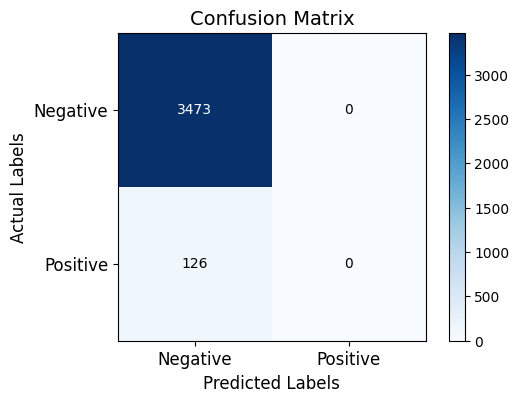

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

# Define class labels
class_labels = ["Negative", "Positive"]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=14)
plt.colorbar()

# Add labels for true positives, true negatives, false positives, and false negatives
thresh = conf_matrix.max() / 2.0
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

# Add labels for axes
plt.xticks(np.arange(len(class_labels)), class_labels, fontsize=12)
plt.yticks(np.arange(len(class_labels)), class_labels, fontsize=12)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("Actual Labels", fontsize=12)

plt.show()


In [12]:
import joblib

# Save the trained pipeline to a file
model_filename = "model_2.pkl"
joblib.dump(pipeline, model_filename)

print(f"Model saved to {model_filename}")


Model saved to model_2.pkl


In [13]:
# Load the saved model
loaded_model = joblib.load(model_filename)

# You can now use loaded_model for making predictions or further analysis
